# Goal
Problem statement (Term Deposit Sale)
 Using the data collected from existing customers, build a model that will help the marketing team identify potential customers who are relatively more likely to subscribe term deposit and thus increase their hit ratio.

In [1]:
# Importing all the required libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline 

import seaborn as sns

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image  
from sklearn import tree
from os import system

import warnings
warnings.filterwarnings('ignore')

In [2]:
bankData= pd.read_csv("bank-full.csv")

In [3]:
bankData.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'Target'],
      dtype='object')

# Deliverable – 1 (Exploratory data quality report reflecting the following) – (20)

## 1. Univariate analysis (12 marks)
a. Univariate analysis – data types and description of the independent attributes
which should include (name, meaning, range of values observed, central values (mean and median), standard deviation and quartiles, analysis of the body of distributions / tails, missing values, outliers.

b. Strategies to address the different data challenges such as data pollution, outlier’s treatment and missing values treatment.

c. Please provide comments in jupyter notebook regarding the steps you take and insights drawn from the plots.


In [4]:
print ("Shape of Data")
print (bankData.shape)
print ("")
print ("Columns")
print (bankData.columns)
print ("")


Shape of Data
(45211, 17)

Columns
Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'Target'],
      dtype='object')



### Dirstibution of Data

In [5]:
# Assigning Numeric columns and Non-Numeric columns into 2 variables:
num_columns =['age','balance','day','duration','campaign','pdays','previous']
non_num_columns = [ 'job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact', 'month', 'poutcome', 'Target']


#### To see the distribution of all numeric columns


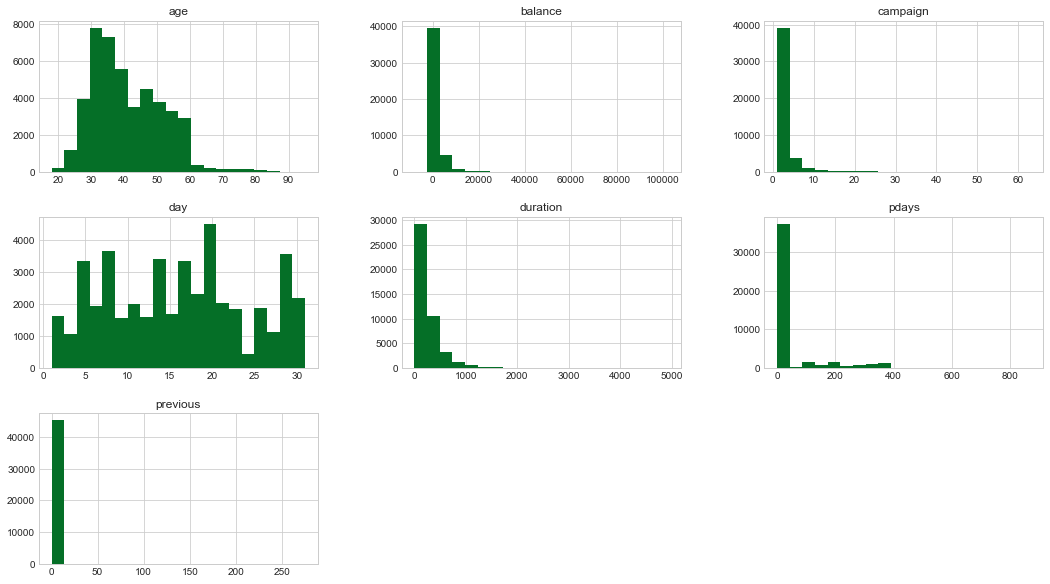

In [6]:

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
bankData[num_columns].hist(bins=20, figsize=(18,10), color='#056F27')
plt.show()

#### To see the distribution of all non-numeric columns

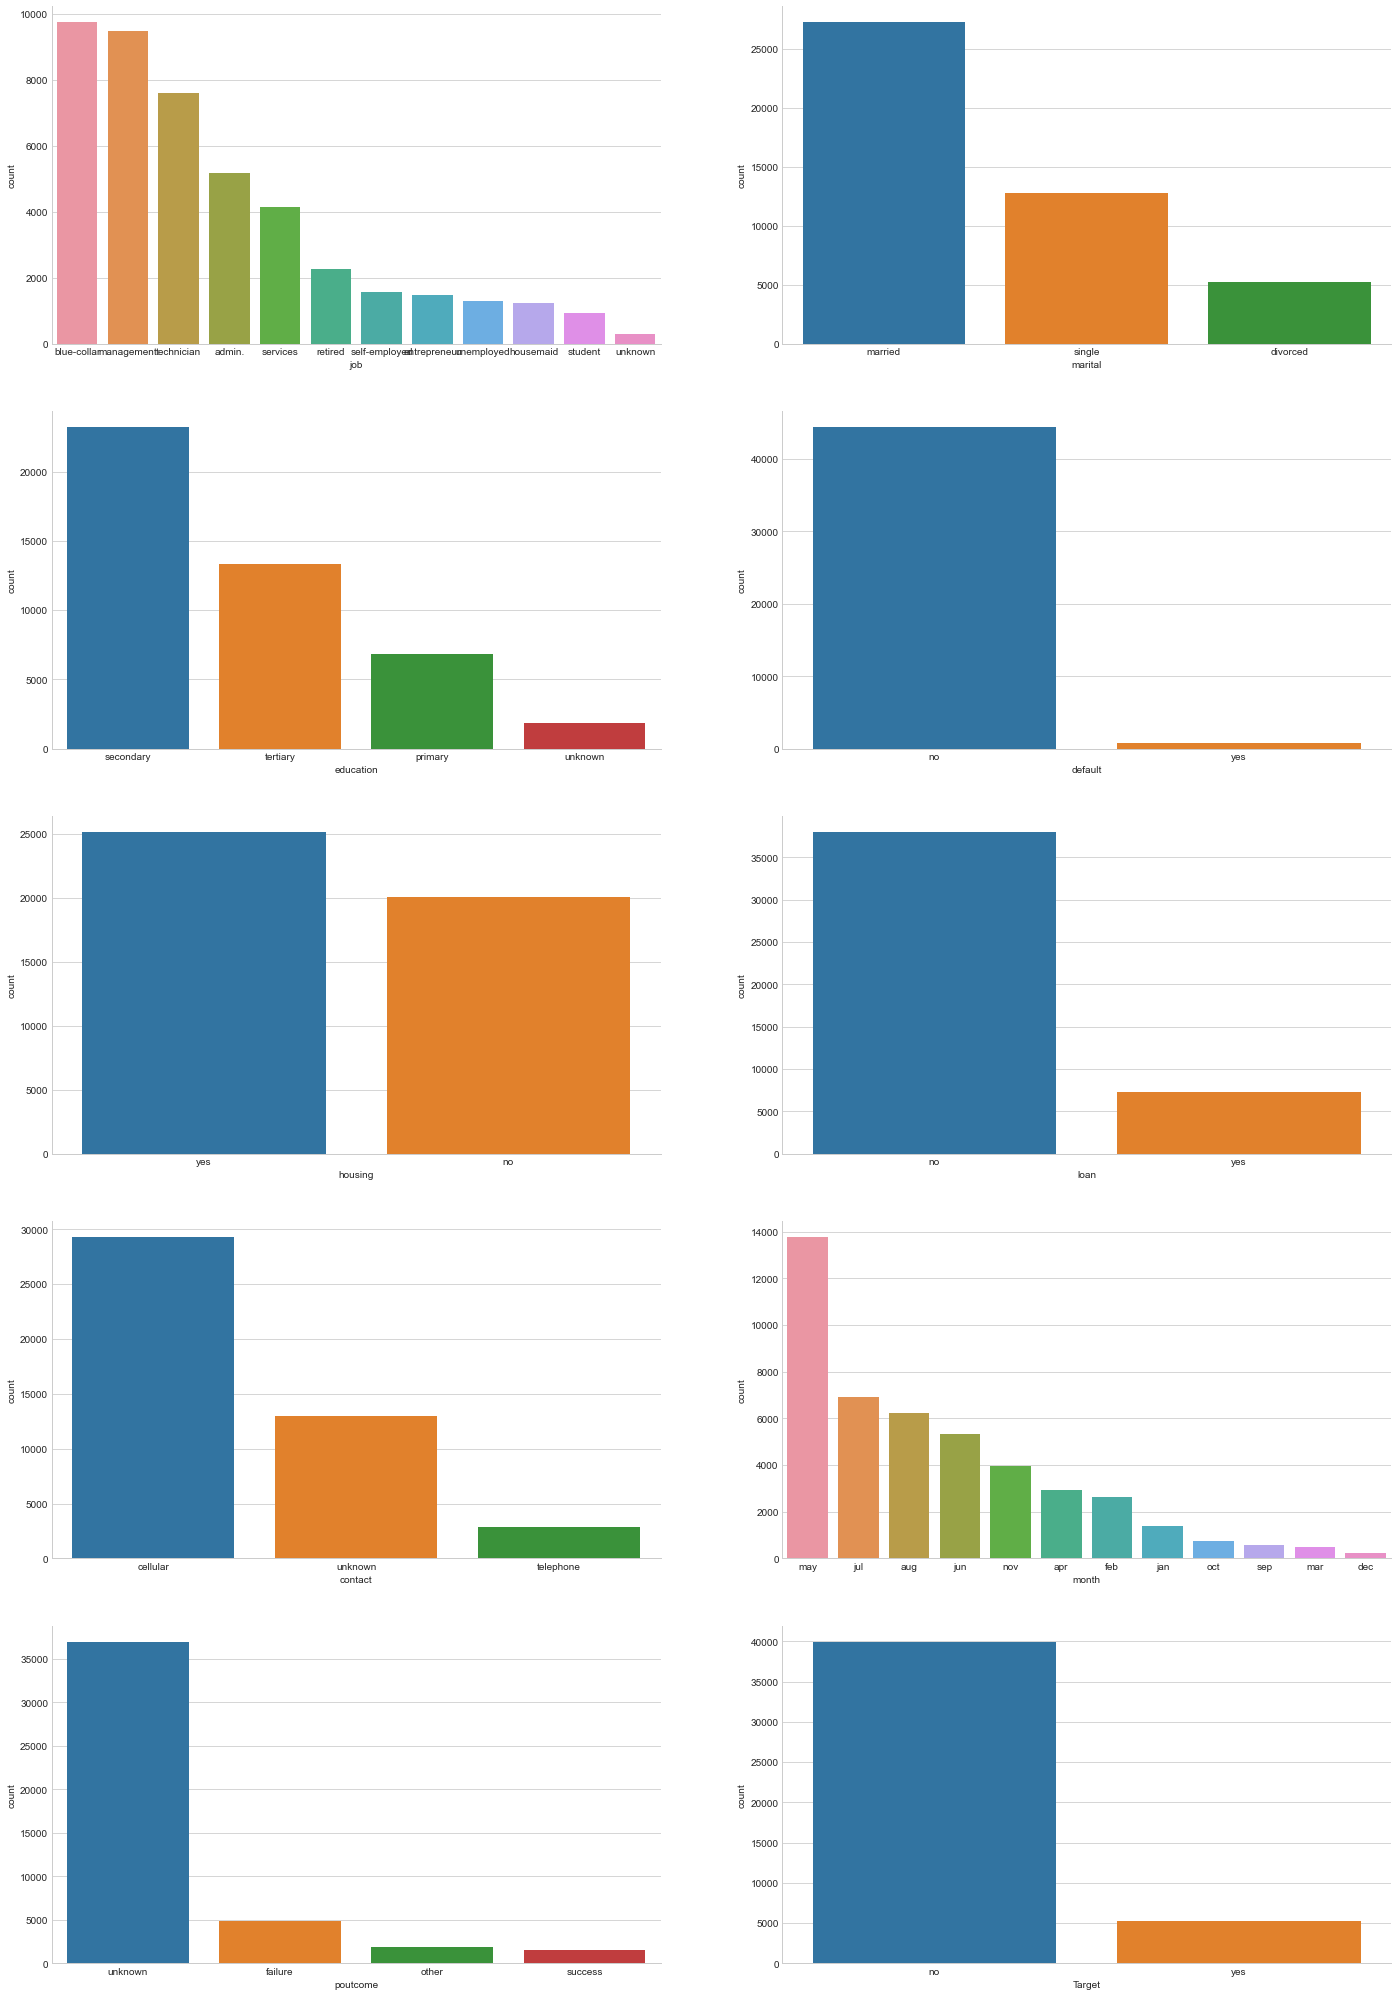

In [7]:
# To see the distribution of all Non-Numberic columns
f, axes = plt.subplots(5, 2, figsize=(24, 36), sharex=False)
sns.despine(left=False)

for i,col in enumerate(non_num_columns):
    sns.countplot(bankData[col],order = bankData[col].value_counts().index,ax=axes[i//2,i%2])


#### To print Summary Stats, outliers and missing values for all numeric columns


In [8]:


from scipy import stats

#name, meaning, 
#range of values observed, 
#central values (mean and median), 
#standard deviation and quartiles, analysis of the body of distributions / tails, missing values, outliers.




for i,j in enumerate(num_columns):
    print ('')
    print ('')
    print ("Column Name : %s"%j)
    print ("Meaning     : %s"%j)
    print ('')
    print (bankData[j].describe())
    out=bankData[np.abs(stats.zscore(bankData[j])) >=3][j].count()
    print ("Number of Outlier value : %s"%out)
    missing_values=bankData[j].isnull().sum()
    print ("Number of Missing values : %s"%missing_values)





Column Name : age
Meaning     : age

count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64
Number of Outlier value : 381
Number of Missing values : 0


Column Name : balance
Meaning     : balance

count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64
Number of Outlier value : 745
Number of Missing values : 0


Column Name : day
Meaning     : day

count    45211.000000
mean        15.806419
std          8.322476
min          1.000000
25%          8.000000
50%         16.000000
75%         21.000000
max         31.000000
Name: day, dtype: float64
Number of Outlier value : 0
Number of Missing values : 0


Column Name : duration
Meaning     : duration

count    45211.000000
mean       

#### To Remove all outliers at once (Z score >=3 are considered as outliers):

In [9]:

bankDataRaw = bankData
bankData = bankData[(np.abs(stats.zscore(bankData[num_columns])) < 3).all(axis=1)].copy()

In [10]:
print ("Number of Recored before outlier removal :%s"%bankDataRaw.shape[0])
print ("Number of Recored after outlier removal :%s"%bankData.shape[0])

Number of Recored before outlier removal :45211
Number of Recored after outlier removal :40209


#### To see the distribution of data before and after the outlier removal

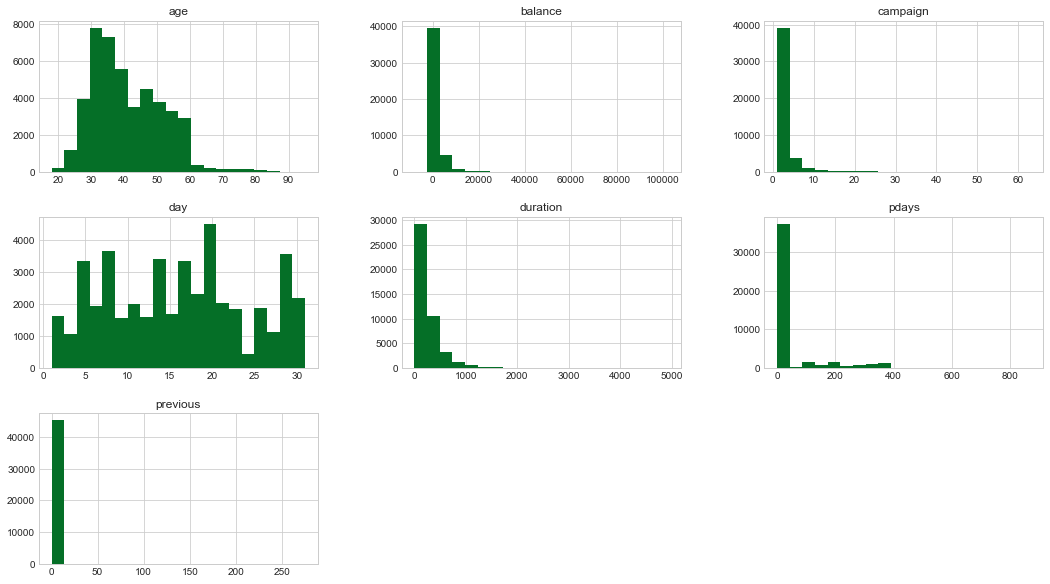

In [11]:
# Before outlier removal
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
bankDataRaw[num_columns].hist(bins=20, figsize=(18,10), color='#056F27')
plt.show()


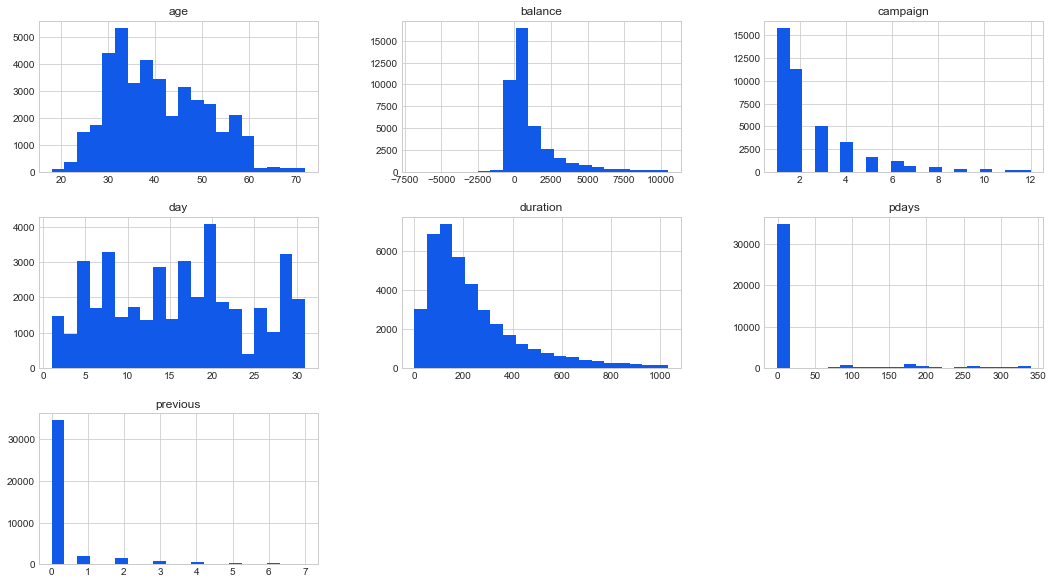

In [12]:
# After outlier removal

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
bankData[num_columns].hist(bins=20, figsize=(18,10), color='#1159E9')
plt.show()

#### Observation from the plots:
-    As seen on the before and after outlier removal plots, Data skewness is much better for Balance, Campaign and Duration columns

-    As seen on the distribution plots, data is not really symmetric

-    Data looks to be skewed for both pdays and previous columbs

-    Age looks to be uniformly distribued


    

# 2. Multivariate analysis (8 marks)
a. Bi-variate analysis between the predictor variables and target column. Comment
on your findings in terms of their relationship and degree of relation if any. Visualize the analysis using boxplots and pair plots, histograms or density curves. Select the most appropriate attributes.


b. Please provide comments in jupyter notebook regarding the steps you take and insights drawn from the plots

### Bi-Variate analysis for all the numeric columns

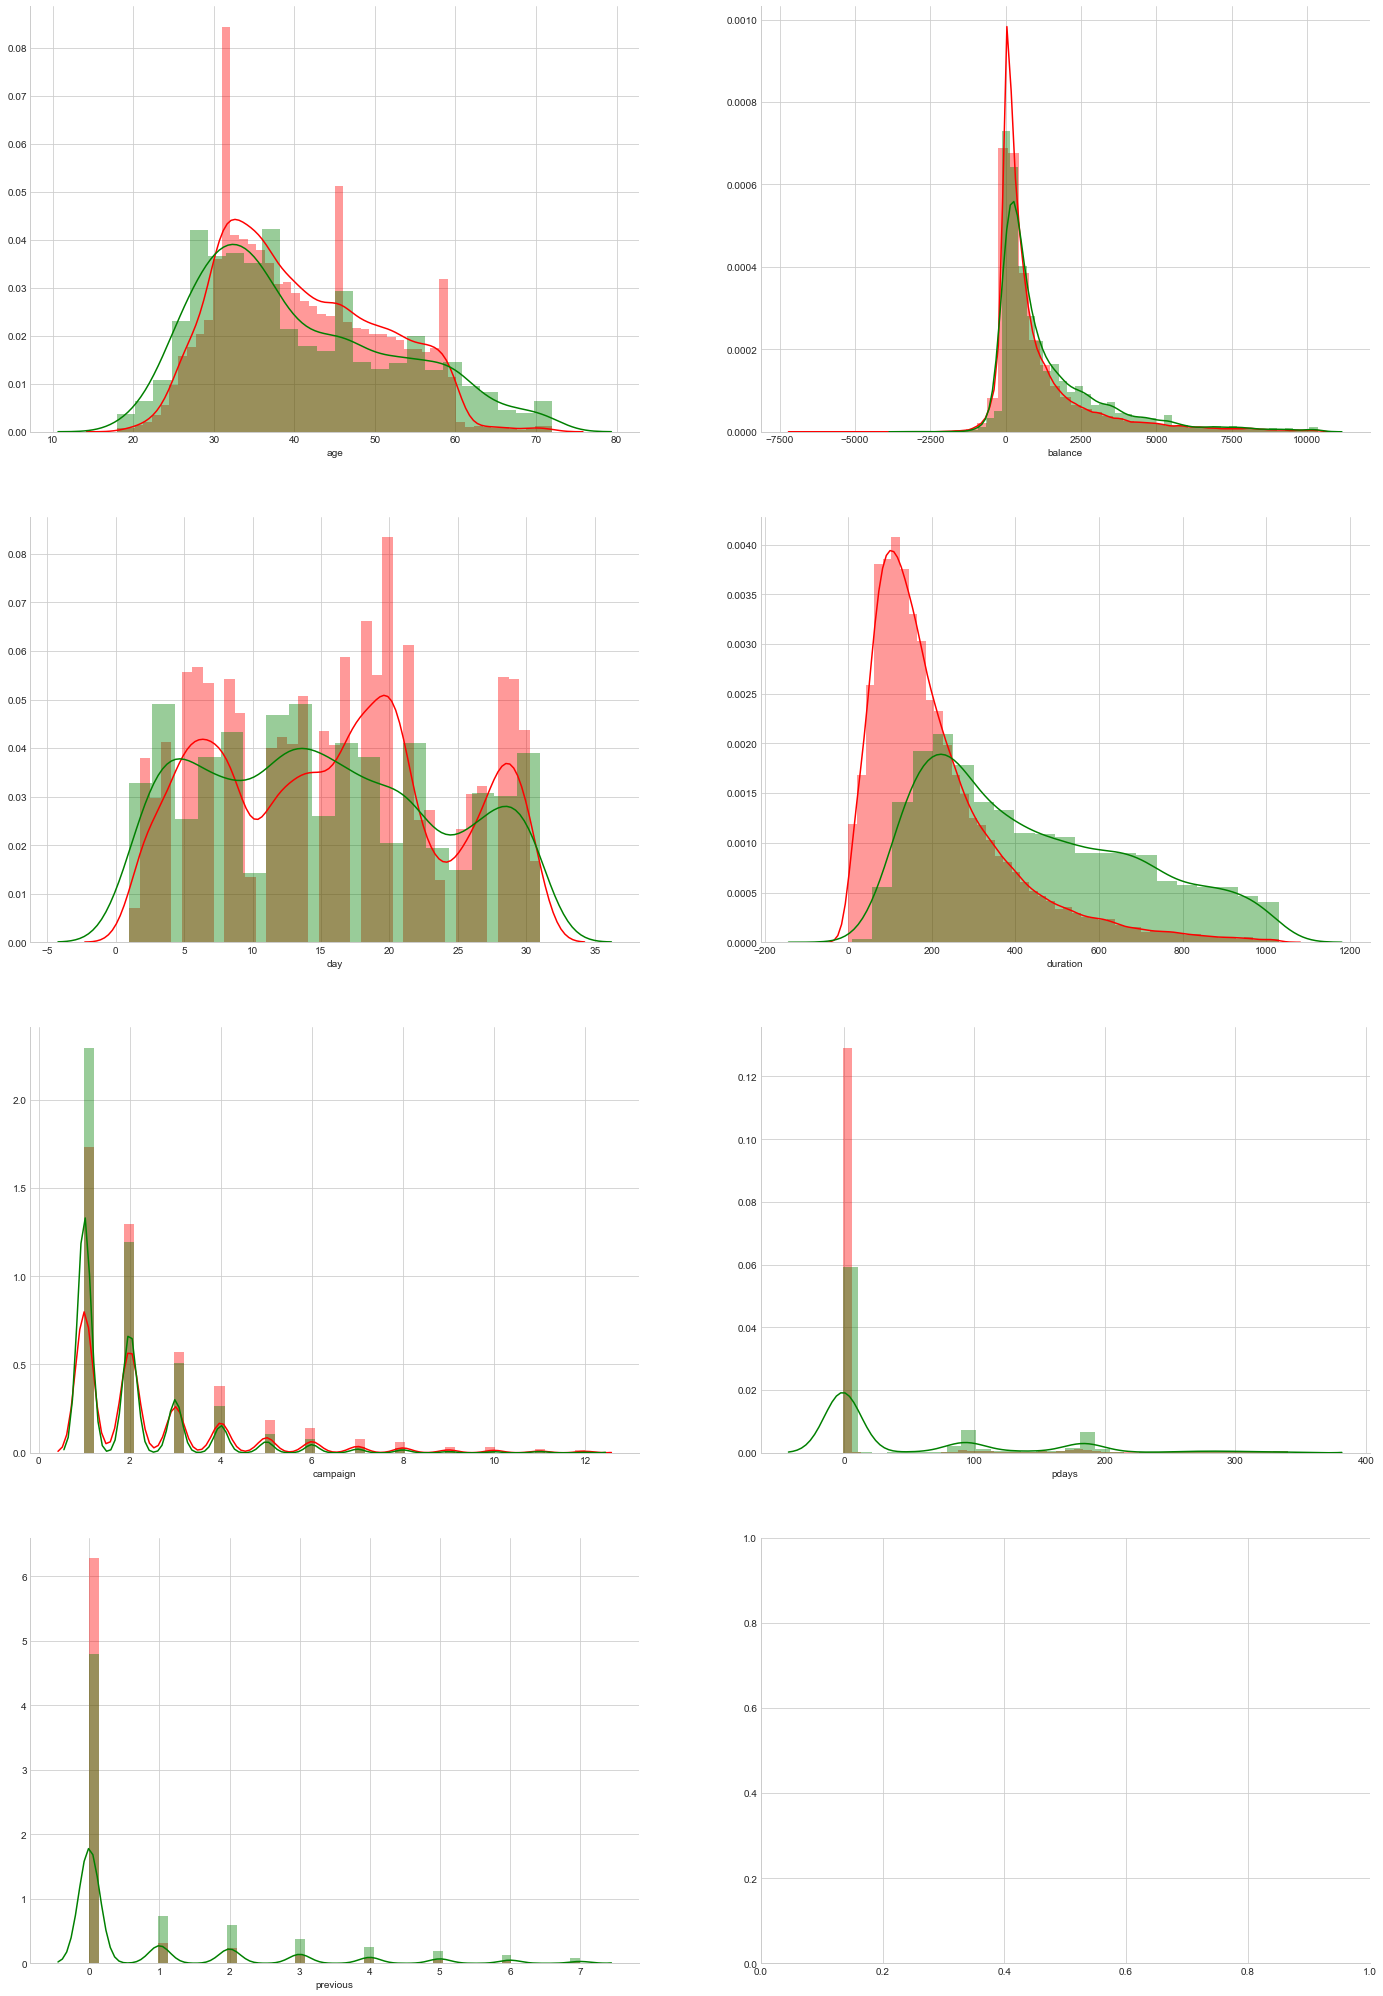

In [13]:
#Distplot of all numeric columns
f, axes = plt.subplots(4, 2, figsize=(24, 36), sharex=False)
sns.despine(left=False)

for i,col in enumerate(num_columns):
    sns.distplot(bankData[bankData['Target']=='no'][col],color='r',label=0,kde=True,ax=axes[i//2,i%2])
    sns.distplot(bankData[bankData['Target']=='yes'][col],color='g',label=1,kde=True,ax=axes[i//2,i%2])
    
    

### Bivariate analysis for all the categorical columns

In [14]:
# Build a function to show categorical values disribution
def plot_bar(column,df):
    data=df
    # temp df 
    temp_1 = pd.DataFrame()
    # count categorical values
    temp_1['Target = No'] =  data[data['Target'] == 'no'][column].value_counts()
    temp_1['Target = Yes'] = data[data['Target'] == 'yes'][column].value_counts()
    
    temp_1.plot(kind='bar')
    plt.xlabel(f'{column}')
    plt.ylabel('Number of clients')
    plt.title('Distribution of {} and Target'.format(column))

    plt.show();

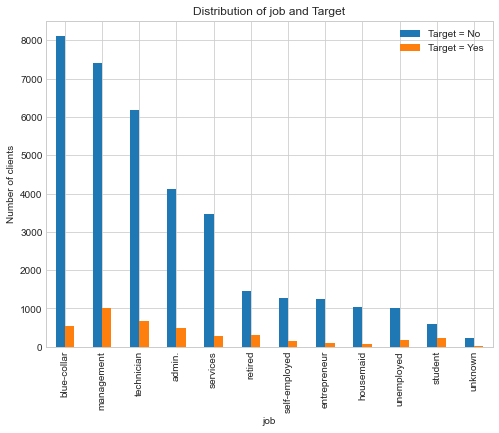

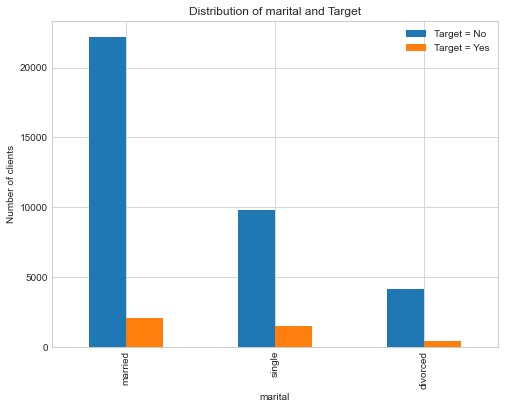

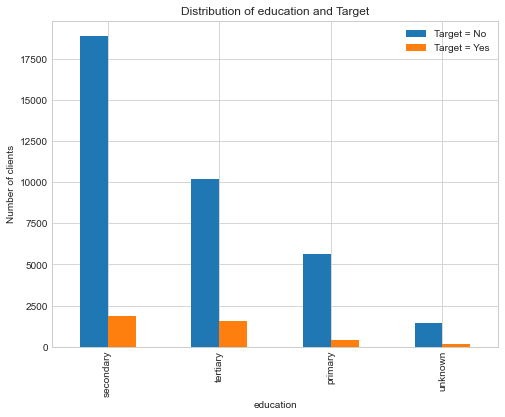

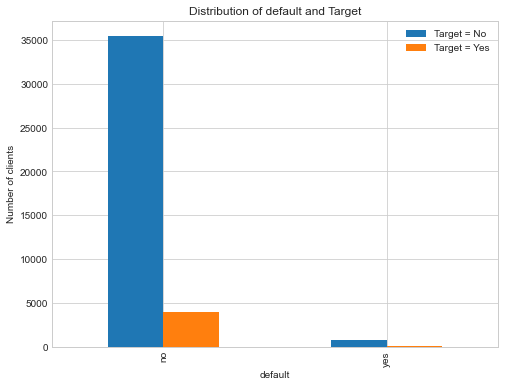

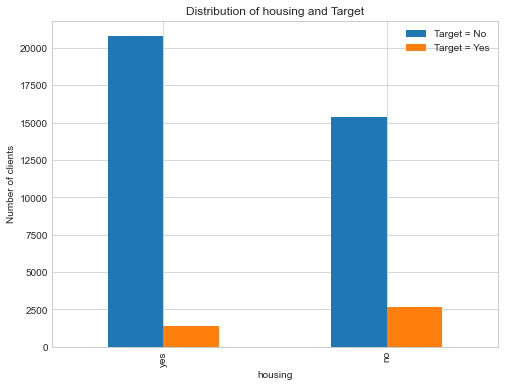

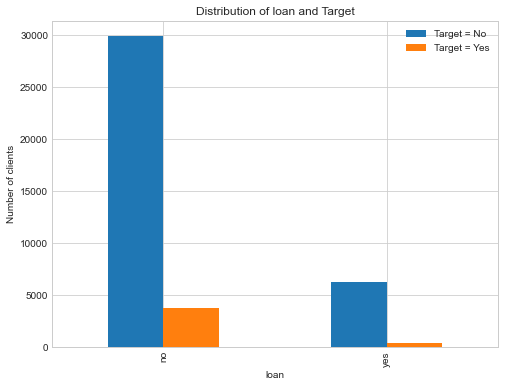

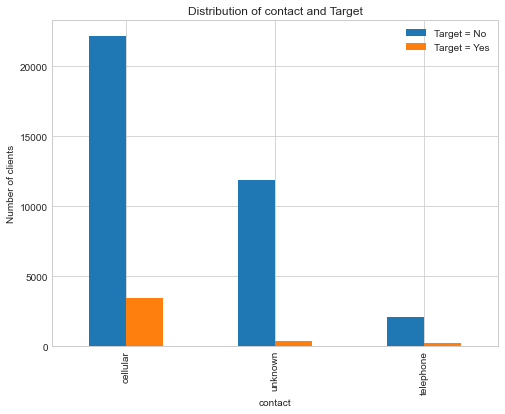

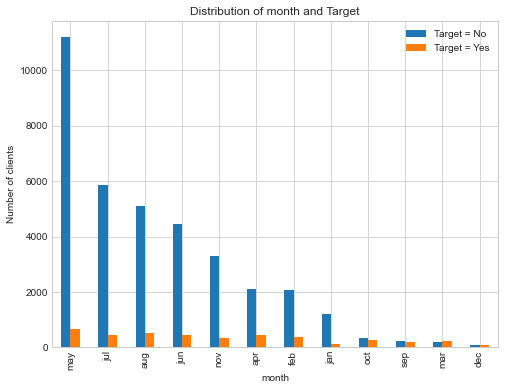

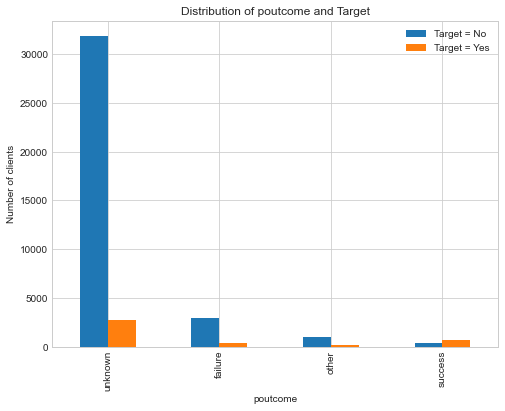

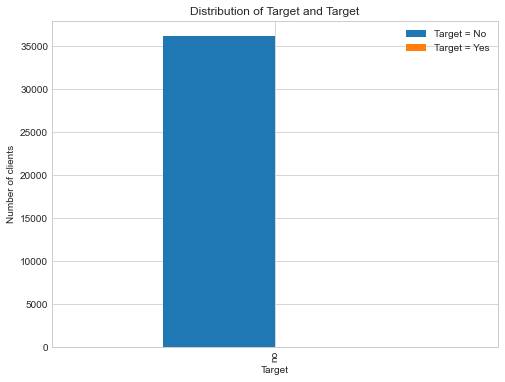

In [15]:
plt.rcParams["figure.figsize"] = [8,6]
for i,col in enumerate(non_num_columns):
    plot_bar(col,bankData)




### Correlation analysis

In [16]:
corr = bankData.corr()
corr

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.094087,-0.010352,-0.025013,0.036492,-0.009888,0.008715
balance,0.094087,1.000000,0.010047,0.031384,-0.017348,0.040709,0.055668
day,-0.010352,0.010047,1.000000,-0.024773,0.133115,-0.063337,-0.053733
duration,-0.025013,0.031384,-0.024773,1.000000,-0.077086,0.014537,0.018723
campaign,0.036492,-0.017348,0.133115,-0.077086,1.000000,-0.088429,-0.064500
pdays,-0.009888,0.040709,-0.063337,0.014537,-0.088429,1.000000,0.719905
previous,0.008715,0.055668,-0.053733,0.018723,-0.064500,0.719905,1.000000


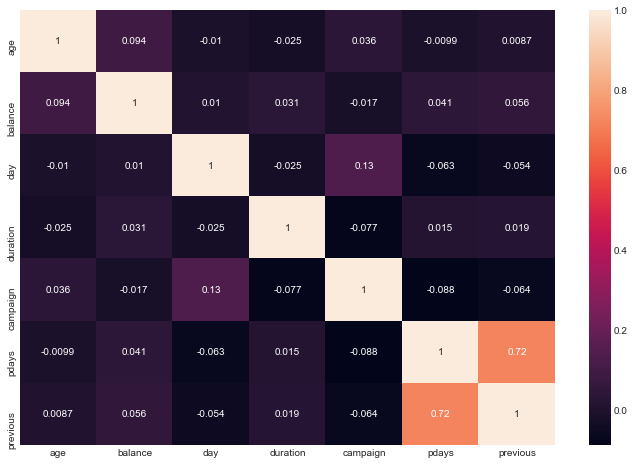

In [17]:
plt.subplots(figsize=(12,8))
sns.heatmap(corr,annot=True)

### To see % distribution of non-numeric columns by Target variable in a heat map

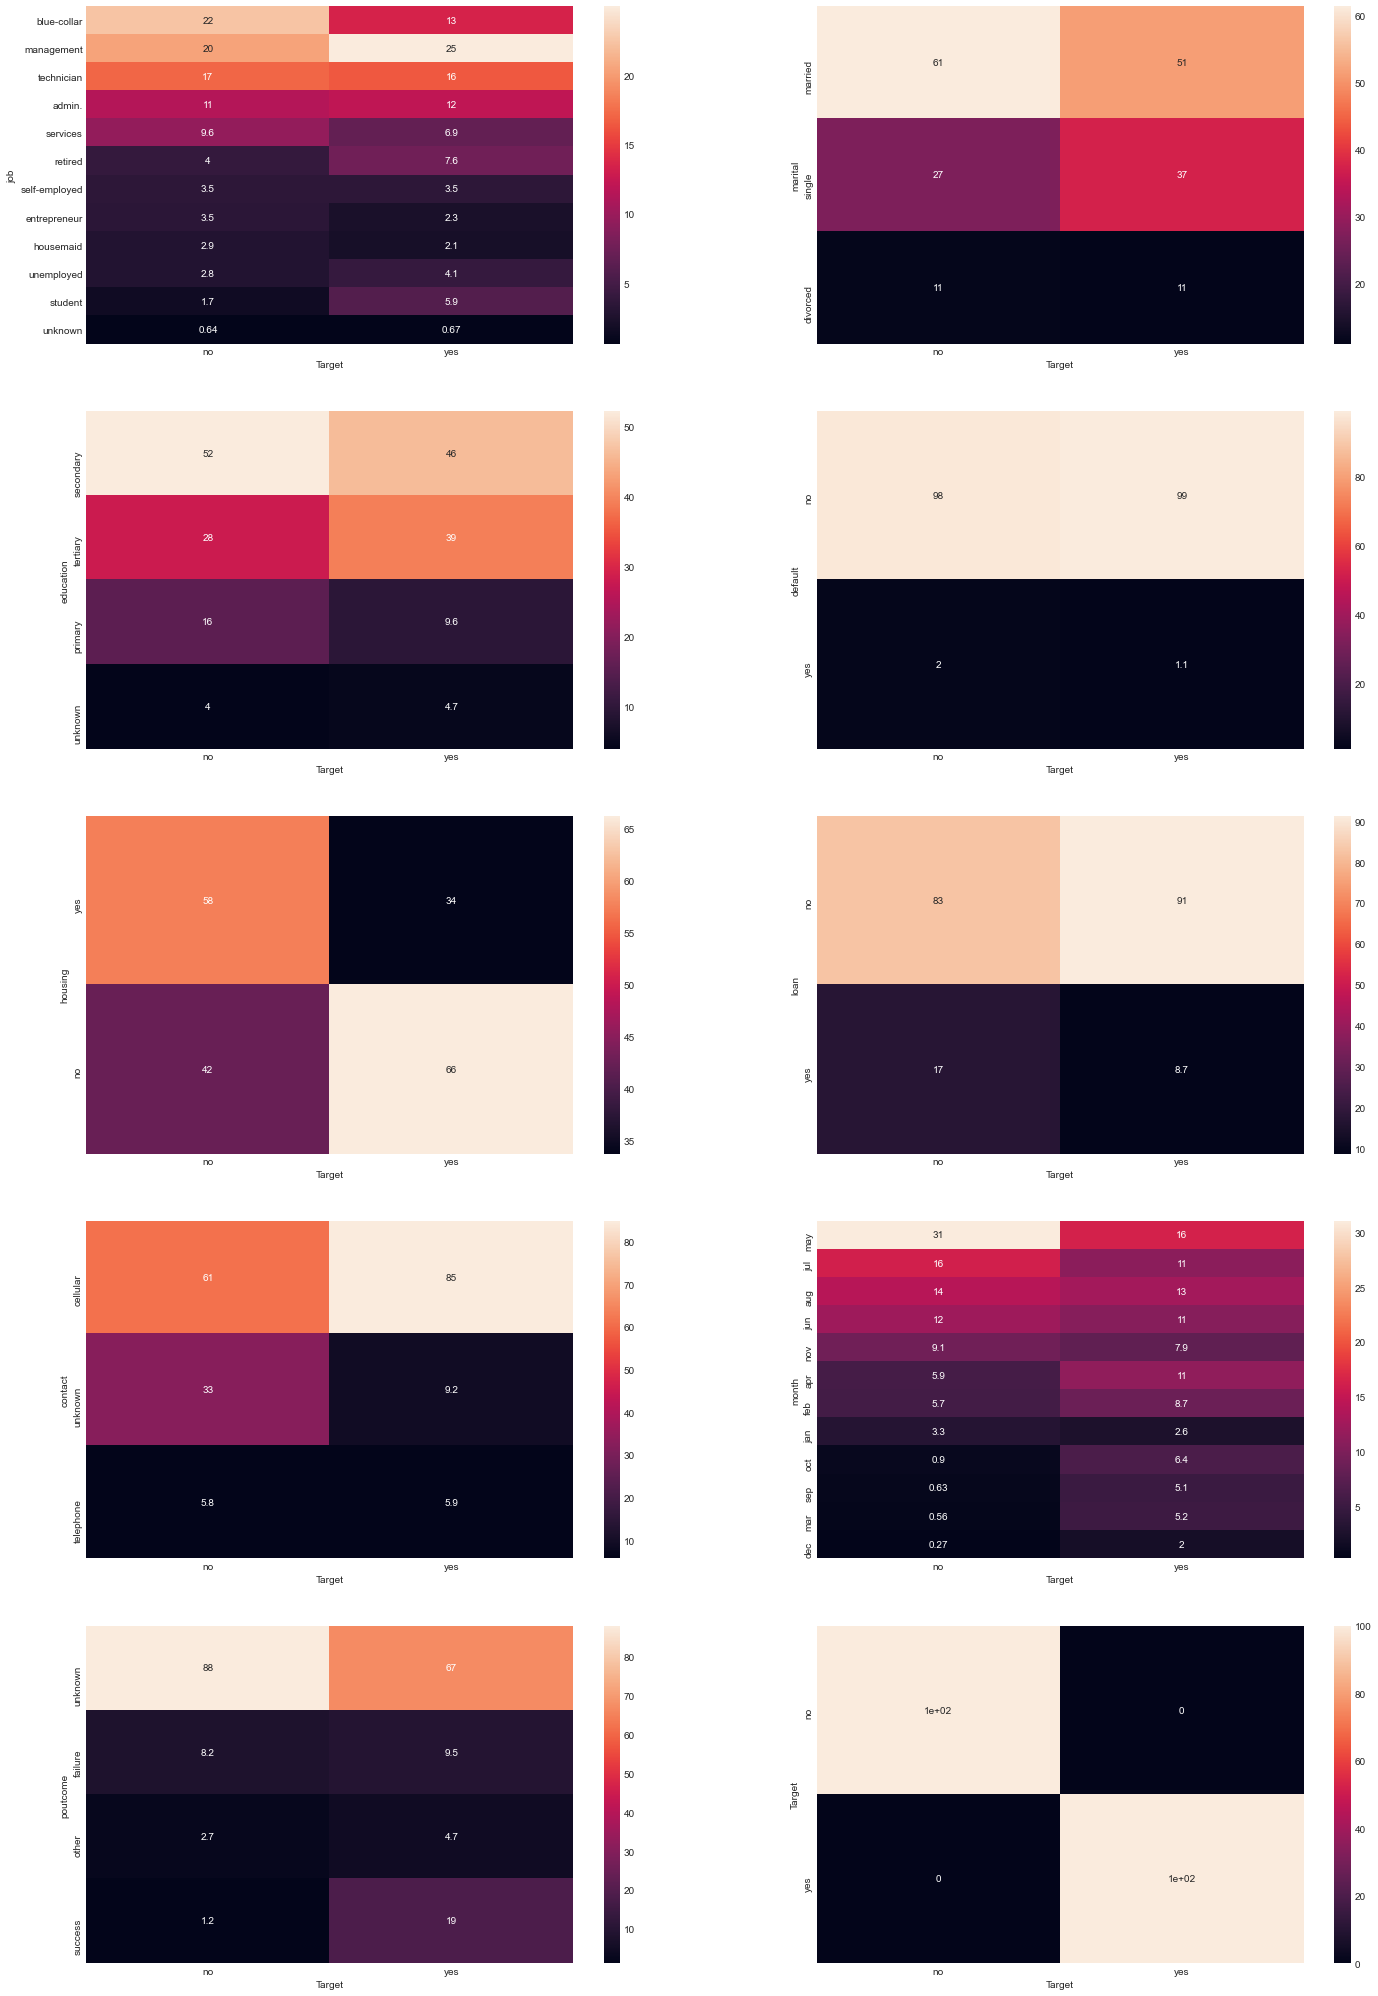

In [18]:

f, axes = plt.subplots(5, 2, figsize=(24, 36), sharex=False)
sns.despine(left=False)

for i,col in enumerate(non_num_columns):
    input_df=(pd.crosstab(bankData[col],bankData['Target'],normalize='columns')*100).sort_values(by=['no','yes'],ascending=False)
    sns.heatmap(input_df,annot=True,ax=axes[i//2,i%2])

### To see % distribution of non-numeric columns by Target variable in a Grid

In [19]:

for i,col in enumerate(non_num_columns):
    print (col)
    print ('--------')
    input_df=(pd.crosstab(bankData[col],bankData['Target'],normalize='columns')*100).sort_values(by=['no','yes'],ascending=False)
    print (input_df)
    print ('---------------------------------------------------------------------')

job
--------
Target                no        yes
job                                
blue-collar    22.431199  13.492847
management     20.459134  24.963000
technician     17.101369  16.452886
admin.         11.411976  12.062161
services        9.605864   6.857425
retired         4.018808   7.597435
self-employed   3.493293   3.502713
entrepreneur    3.476698   2.318698
housemaid       2.876504   2.121362
unemployed      2.826718   4.070054
student         1.659522   5.895412
unknown         0.638916   0.666009
---------------------------------------------------------------------
marital
--------
Target           no        yes
marital                       
married   61.413359  51.455353
single    27.108284  37.493833
divorced  11.478357  11.050814
---------------------------------------------------------------------
education
--------
Target            no        yes
education                      
secondary  52.172590  46.324618
tertiary   28.233993  39.343858
primary    15.618863   9


#### Observation from the plots:
-    As data is not symmetrical, pairplot may not really help us
-    And correlation analysis is completed to find the relationship with the variables
-    As we don't see any specific independant variable highly correlated to the target variable, multiple features are required to build this model


- Blue collar clients are less likely to subscribe for term deposit 

- Married customers are less likely to subscribe for term deposit (i.e., 61% of the unsubscribers are Married)

- Clients with 'cellular' type of contact are less likely to subscribe for term deposit.

- Clients who subscribed for term deposit tend to have greater balance and age values.


# Deliverable – 2 (Prepare the data for analytics) – (10)
1. Ensure the attribute types are correct. If not, take appropriate actions.
2. Get the data model ready.
3. Transform the data i.e. scale / normalize if required
4. Create the training set and test set in ratio of 70:30

In [20]:
# To check if data type is correct
bankData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40209 entries, 0 to 45209
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40209 non-null  int64 
 1   job        40209 non-null  object
 2   marital    40209 non-null  object
 3   education  40209 non-null  object
 4   default    40209 non-null  object
 5   balance    40209 non-null  int64 
 6   housing    40209 non-null  object
 7   loan       40209 non-null  object
 8   contact    40209 non-null  object
 9   day        40209 non-null  int64 
 10  month      40209 non-null  object
 11  duration   40209 non-null  int64 
 12  campaign   40209 non-null  int64 
 13  pdays      40209 non-null  int64 
 14  previous   40209 non-null  int64 
 15  poutcome   40209 non-null  object
 16  Target     40209 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.5+ MB


In [21]:
# To check if any Null values
print (bankData.isnull().sum())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64


In [22]:
# To change the object datatype to category
for feature in bankData.columns: # Loop through all columns in the dataframe
    if bankData[feature].dtype == 'object': # Only apply for columns with categorical strings
        bankData[feature] = pd.Categorical(bankData[feature])


In [23]:
bankData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40209 entries, 0 to 45209
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        40209 non-null  int64   
 1   job        40209 non-null  category
 2   marital    40209 non-null  category
 3   education  40209 non-null  category
 4   default    40209 non-null  category
 5   balance    40209 non-null  int64   
 6   housing    40209 non-null  category
 7   loan       40209 non-null  category
 8   contact    40209 non-null  category
 9   day        40209 non-null  int64   
 10  month      40209 non-null  category
 11  duration   40209 non-null  int64   
 12  campaign   40209 non-null  int64   
 13  pdays      40209 non-null  int64   
 14  previous   40209 non-null  int64   
 15  poutcome   40209 non-null  category
 16  Target     40209 non-null  category
dtypes: category(10), int64(7)
memory usage: 2.8 MB


In [24]:
replaceStruct = {
                "education":     {"primary": 1, "secondary": 2 ,"tertiary": 3 ,"unknown":-1},
                "default": {"no": 0, "yes": 1 } ,
                 "housing": {"no": 0, "yes": 1 } ,
                 "loan":     {"no": 0, "yes": 1 },
                  "Target":     {"no": 0, "yes": 1 },
                    }
oneHotCols=["job","marital","contact","poutcome"]


In [25]:
bankData.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'Target'],
      dtype='object')

In [26]:
bankData.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [27]:
bankData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40209 entries, 0 to 45209
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        40209 non-null  int64   
 1   job        40209 non-null  category
 2   marital    40209 non-null  category
 3   education  40209 non-null  category
 4   default    40209 non-null  category
 5   balance    40209 non-null  int64   
 6   housing    40209 non-null  category
 7   loan       40209 non-null  category
 8   contact    40209 non-null  category
 9   day        40209 non-null  int64   
 10  month      40209 non-null  category
 11  duration   40209 non-null  int64   
 12  campaign   40209 non-null  int64   
 13  pdays      40209 non-null  int64   
 14  previous   40209 non-null  int64   
 15  poutcome   40209 non-null  category
 16  Target     40209 non-null  category
dtypes: category(10), int64(7)
memory usage: 2.8 MB


In [28]:
bankData=bankData.replace(replaceStruct)
bankData=pd.get_dummies(bankData, columns=oneHotCols)

In [29]:
bankData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40209 entries, 0 to 45209
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   age                40209 non-null  int64   
 1   education          40209 non-null  int64   
 2   default            40209 non-null  int64   
 3   balance            40209 non-null  int64   
 4   housing            40209 non-null  int64   
 5   loan               40209 non-null  int64   
 6   day                40209 non-null  int64   
 7   month              40209 non-null  category
 8   duration           40209 non-null  int64   
 9   campaign           40209 non-null  int64   
 10  pdays              40209 non-null  int64   
 11  previous           40209 non-null  int64   
 12  Target             40209 non-null  int64   
 13  job_admin.         40209 non-null  uint8   
 14  job_blue-collar    40209 non-null  uint8   
 15  job_entrepreneur   40209 non-null  uint8   
 16  job_

In [30]:
bankData.head()

,age,education,default,balance,housing,loan,day,month,duration,campaign,...,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,3,0,2143,1,0,5,may,261,1,...,0,1,0,0,0,1,0,0,0,1
1,44,2,0,29,1,0,5,may,151,1,...,0,0,1,0,0,1,0,0,0,1
2,33,2,0,2,1,1,5,may,76,1,...,0,1,0,0,0,1,0,0,0,1
3,47,-1,0,1506,1,0,5,may,92,1,...,0,1,0,0,0,1,0,0,0,1
4,33,-1,0,1,0,0,5,may,198,1,...,0,0,1,0,0,1,0,0,0,1


In [31]:
# Month & Day are not very meaningfull, dropping those columns

bankData=bankData.drop(['month','day'],axis=1)

In [32]:
# To make sure, everything is numberic
bankData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40209 entries, 0 to 45209
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   age                40209 non-null  int64
 1   education          40209 non-null  int64
 2   default            40209 non-null  int64
 3   balance            40209 non-null  int64
 4   housing            40209 non-null  int64
 5   loan               40209 non-null  int64
 6   duration           40209 non-null  int64
 7   campaign           40209 non-null  int64
 8   pdays              40209 non-null  int64
 9   previous           40209 non-null  int64
 10  Target             40209 non-null  int64
 11  job_admin.         40209 non-null  uint8
 12  job_blue-collar    40209 non-null  uint8
 13  job_entrepreneur   40209 non-null  uint8
 14  job_housemaid      40209 non-null  uint8
 15  job_management     40209 non-null  uint8
 16  job_retired        40209 non-null  uint8
 17  job_self-emp

# Splitting the data

In [33]:
X = bankData.drop("Target" , axis=1)
y = bankData.pop("Target")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

In [34]:
X_train.shape

(28146, 32)

In [35]:
X_test.shape

(12063, 32)

In [36]:
y_train.shape

(28146,)

In [37]:
y_test.shape

(12063,)

### To make sure, Target values are balanced between Test & Train datasets

In [38]:
y_train.value_counts(normalize=True)

0    0.898458
1    0.101542
Name: Target, dtype: float64

In [39]:
y_test.value_counts(normalize=True)

0    0.900854
1    0.099146
Name: Target, dtype: float64

In [40]:
y.value_counts(normalize=True)

0    0.899177
1    0.100823
Name: Target, dtype: float64

# Deliverable – 3 (create the ensemble model) – (30)
1. First create models using Logistic Regression and Decision Tree algorithm. Note the model performance by using different matrices. Use confusion matrix to evaluate class level metrics i.e. Precision/Recall. Also reflect the accuracy and F1 score of the model. (10 marks)
2. Build the ensemble models (Bagging and Boosting) and note the model performance by using different matrices. Use same metrics as in above model. (at least 3 algorithms) (15 marks)
3. Make a DataFrame to compare models and their metrics. Give conclusion regarding the best algorithm and your reason behind it. (5 marks)
     

## 1. Building Decision Tree

In [41]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
from sklearn.linear_model import LogisticRegression


log_cols=['Name','Training_Score','Testing_Score','Recall','Precision','F1_Score','Roc_Auc_Score']
log = pd.DataFrame(columns=log_cols)

In [42]:
cls = DecisionTreeClassifier(criterion = 'gini', random_state=1)
cls.fit(X_train, y_train)

print(cls.score(X_train, y_train))
print(cls.score(X_test, y_test))


1.0
0.8719224073613528


In [43]:
#Reduce overfitting by setting the max_depth = 3
cls = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=1)
cls.fit(X_train, y_train)
print(cls.score(X_train, y_train))
print(cls.score(X_test, y_test))


0.9101115611454559
0.9107187266849043


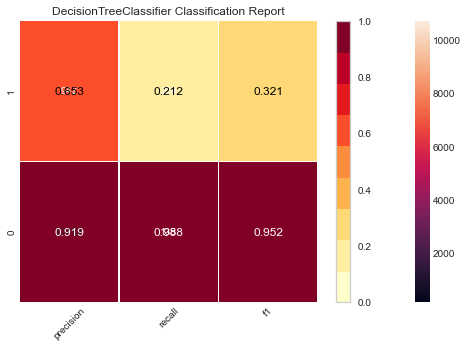

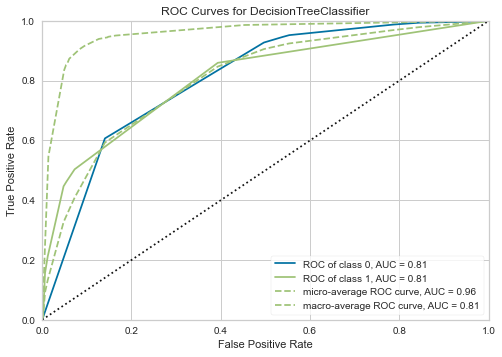

In [44]:
y_predict = cls.predict(X_test)

cm=metrics.confusion_matrix(y_test, y_predict, labels=[0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))



Name='Decision Tree'
Training_Score=cls.score(X_train, y_train)
Testing_Score=cls.score(X_test, y_test)
Recall=recall_score(y_test,y_predict)
Precision=precision_score(y_test,y_predict)
F1_Score=f1_score(y_test,y_predict)
Roc_Auc_Score=roc_auc_score(y_test,y_predict)


log_entry = pd.DataFrame([[Name,Training_Score,Testing_Score,Recall,Precision,F1_Score,Roc_Auc_Score]], columns=log_cols)
log = log.append(log_entry)
sns.heatmap(df_cm, annot=True ,fmt='g')


from yellowbrick.classifier import ClassificationReport, ROCAUC
viz = ClassificationReport(cls)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()


roc = ROCAUC(cls)
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

## 2.Building a logistic Regression

In [45]:

cls = LogisticRegression(random_state=7,solver='lbfgs', max_iter=1500)


0.9106800255808996
0.9121279946945204


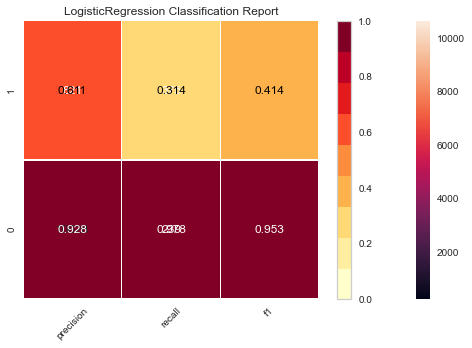

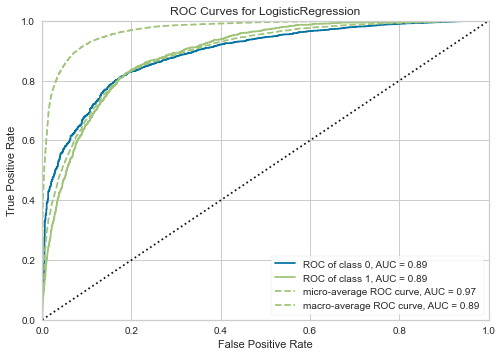

In [46]:
cls.fit(X_train, y_train)
print(cls.score(X_train, y_train))
print(cls.score(X_test, y_test))

y_predict = cls.predict(X_test)

cm=metrics.confusion_matrix(y_test, y_predict, labels=[0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))



Name='Logistic Regression'
Training_Score=cls.score(X_train, y_train)
Testing_Score=cls.score(X_test, y_test)
Recall=recall_score(y_test,y_predict)
Precision=precision_score(y_test,y_predict)
F1_Score=f1_score(y_test,y_predict)
Roc_Auc_Score=roc_auc_score(y_test,y_predict)


log_entry = pd.DataFrame([[Name,Training_Score,Testing_Score,Recall,Precision,F1_Score,Roc_Auc_Score]], columns=log_cols)
log = log.append(log_entry)
sns.heatmap(df_cm, annot=True ,fmt='g')

from yellowbrick.classifier import ClassificationReport, ROCAUC
viz = ClassificationReport(cls)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()


roc = ROCAUC(cls)
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

## 3. Ensemble Learning: Bagging

In [47]:
from sklearn.ensemble import BaggingClassifier
cls = BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion = 'gini', random_state=1,max_depth=3), n_estimators=50,random_state=1)


0.9114616641796348
0.9137859570587747


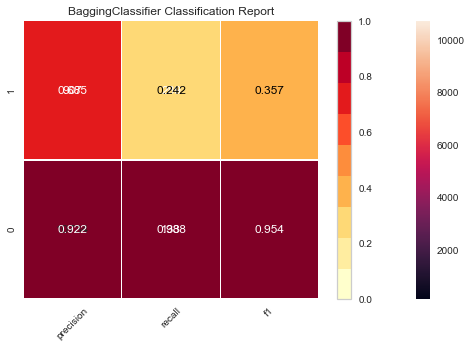

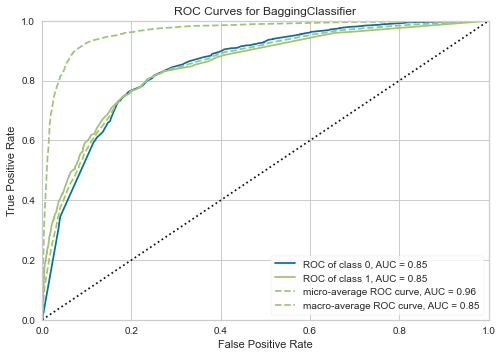

In [48]:
cls.fit(X_train, y_train)
print(cls.score(X_train, y_train))
print(cls.score(X_test, y_test))

y_predict = cls.predict(X_test)

cm=metrics.confusion_matrix(y_test, y_predict, labels=[0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))



Name='Bagging Classifier'
Training_Score=cls.score(X_train, y_train)
Testing_Score=cls.score(X_test, y_test)
Recall=recall_score(y_test,y_predict)
Precision=precision_score(y_test,y_predict)
F1_Score=f1_score(y_test,y_predict)
Roc_Auc_Score=roc_auc_score(y_test,y_predict)


log_entry = pd.DataFrame([[Name,Training_Score,Testing_Score,Recall,Precision,F1_Score,Roc_Auc_Score]], columns=log_cols)
log = log.append(log_entry)
sns.heatmap(df_cm, annot=True ,fmt='g')

from yellowbrick.classifier import ClassificationReport, ROCAUC
viz = ClassificationReport(cls)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()


roc = ROCAUC(cls)
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

## 4.Ensemble: Ada Boosting

In [49]:
from sklearn.ensemble import AdaBoostClassifier
cls = AdaBoostClassifier(n_estimators=10, random_state=1)


0.9052085553897534
0.90906076432065


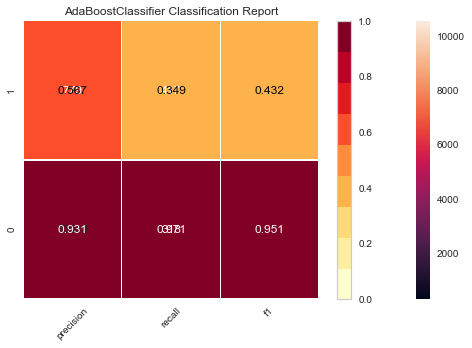

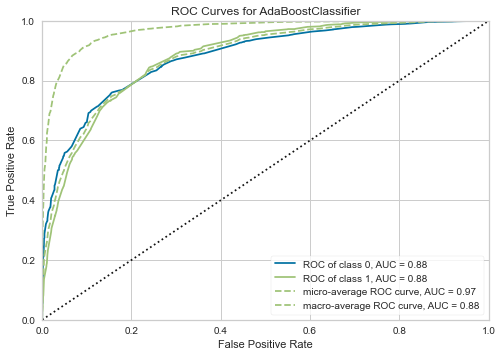

In [50]:
cls.fit(X_train, y_train)
print(cls.score(X_train, y_train))
print(cls.score(X_test, y_test))

y_predict = cls.predict(X_test)

cm=metrics.confusion_matrix(y_test, y_predict, labels=[0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))



Name='AdaBoostClassifier'
Training_Score=cls.score(X_train, y_train)
Testing_Score=cls.score(X_test, y_test)
Recall=recall_score(y_test,y_predict)
Precision=precision_score(y_test,y_predict)
F1_Score=f1_score(y_test,y_predict)
Roc_Auc_Score=roc_auc_score(y_test,y_predict)


log_entry = pd.DataFrame([[Name,Training_Score,Testing_Score,Recall,Precision,F1_Score,Roc_Auc_Score]], columns=log_cols)
log = log.append(log_entry)
sns.heatmap(df_cm, annot=True ,fmt='g')

from yellowbrick.classifier import ClassificationReport, ROCAUC
viz = ClassificationReport(cls)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()


roc = ROCAUC(cls)
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

## 5.Ensemble: GradientBoost

In [51]:
from sklearn.ensemble import GradientBoostingClassifier
cls = GradientBoostingClassifier(n_estimators=50, random_state=1)



0.9150856249555888
0.9138688551769875


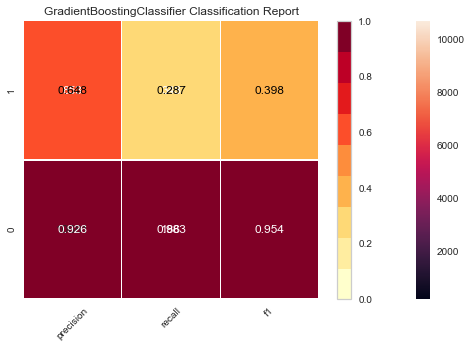

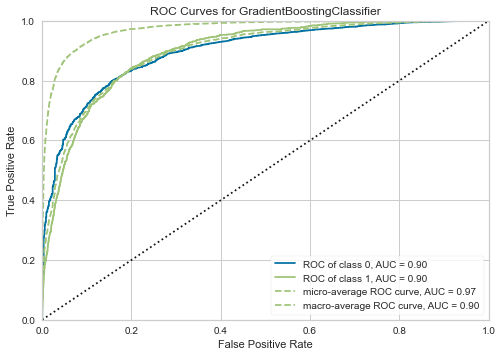

In [52]:
cls.fit(X_train, y_train)
print(cls.score(X_train, y_train))
print(cls.score(X_test, y_test))

y_predict = cls.predict(X_test)

cm=metrics.confusion_matrix(y_test, y_predict, labels=[0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))



Name='GradientBoostingClassifier'
Training_Score=cls.score(X_train, y_train)
Testing_Score=cls.score(X_test, y_test)
Recall=recall_score(y_test,y_predict)
Precision=precision_score(y_test,y_predict)
F1_Score=f1_score(y_test,y_predict)
Roc_Auc_Score=roc_auc_score(y_test,y_predict)


log_entry = pd.DataFrame([[Name,Training_Score,Testing_Score,Recall,Precision,F1_Score,Roc_Auc_Score]], columns=log_cols)
log = log.append(log_entry)
sns.heatmap(df_cm, annot=True ,fmt='g')

from yellowbrick.classifier import ClassificationReport, ROCAUC
viz = ClassificationReport(cls)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()


roc = ROCAUC(cls)
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

## 6.Ensemble:  RandomForest Classifier

In [53]:
from sklearn.ensemble import RandomForestClassifier
cls = RandomForestClassifier(n_estimators=50, random_state=1,max_features=12)


0.9995736516734172
0.9128740777584349


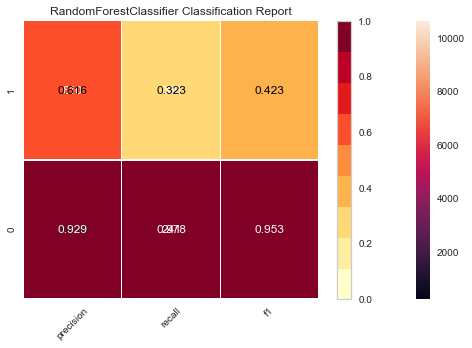

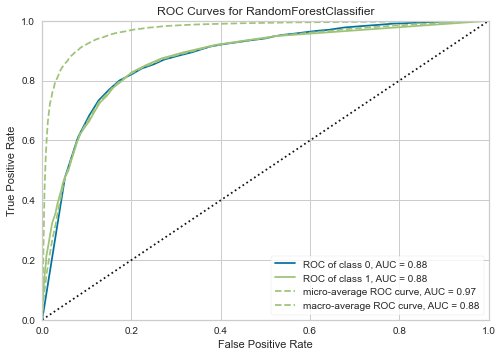

In [54]:
cls.fit(X_train, y_train)
print(cls.score(X_train, y_train))
print(cls.score(X_test, y_test))

y_predict = cls.predict(X_test)

cm=metrics.confusion_matrix(y_test, y_predict, labels=[0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))



Name='RandomForestClassifier'
Training_Score=cls.score(X_train, y_train)
Testing_Score=cls.score(X_test, y_test)
Recall=recall_score(y_test,y_predict)
Precision=precision_score(y_test,y_predict)
F1_Score=f1_score(y_test,y_predict)
Roc_Auc_Score=roc_auc_score(y_test,y_predict)


log_entry = pd.DataFrame([[Name,Training_Score,Testing_Score,Recall,Precision,F1_Score,Roc_Auc_Score]], columns=log_cols)
log = log.append(log_entry)
sns.heatmap(df_cm, annot=True ,fmt='g')

from yellowbrick.classifier import ClassificationReport, ROCAUC
viz = ClassificationReport(cls)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()


roc = ROCAUC(cls)
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

In [55]:
## To print the performance of different models
log

,Name,Training_Score,Testing_Score,Recall,Precision,F1_Score,Roc_Auc_Score
0,Decision Tree,0.910112,0.910719,0.212375,0.652956,0.320505,0.599976
0,Logistic Regression,0.910680,0.912128,0.313545,0.610749,0.414365,0.645776
0,Bagging Classifier,0.911462,0.913786,0.241639,0.684834,0.357231,0.614700
0,AdaBoostClassifier,0.905209,0.909061,0.348662,0.567347,0.431901,0.659700
0,GradientBoostingClassifier,0.915086,0.913869,0.286789,0.648393,0.397681,0.634837
0,RandomForestClassifier,0.999574,0.912874,0.322742,0.615630,0.423478,0.650283


# Conclusion:
    Looking at the dataframe of performance metrics of all models, I will go with the Logistic regression as it has the higher Roc_Auc score and higher accuracy.
    
    Random Forest looks to be overfitting with the training data
    
    Adaboost has best ROC_Auc score, but its accurracy its model score is not as good as Logistic regression
    
    Bagging classifier & GradientBoosting classifier has higher model score, but its ROC_Aus is not as good as Logistic regression
    
    